In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

import itertools
import glob

In [2]:
%run plotting.py

In [3]:
moon_polar_radius = 1736e3  # m
JULIAN_DAY = 86400.0
JULIAN_DAY_ON_J2000 = 2451545.0

acc_names = ["acc_grav_moon", "acc_grav_earth", "acc_grav_sun", "acc_rp_sun"]

In [4]:
def read_simulation_results(dependent_variable_history_file):
    def gen_vector_colnames(names):
        colnames = []
        for name in names:
            if "kepler" in name:
                elements = ["a", "e", "i", "longAscNode", "argPeri", "trueAnom"]
            else:
                elements = ["x", "y", "z"]
            colnames.extend([f"{name}_{elem}" for elem in elements])
        return colnames
    
    # df_prop = pd.read_csv("../../tudat-bundle/output/lro/baseline/lro_propagation_history.dat",
    #                       names=["t", "x", "y", "z", "vx", "vy", "vz"], index_col="t")
    df_dep = pd.read_csv(dependent_variable_history_file,
                         names=gen_vector_colnames(["pos", "vel", "kepler", "pos_sun"] + acc_names))
    # df = pd.merge(df_prop, df_dep, left_index=True, right_index=True, validate="1:1")
    df = df_dep
    
    df["t_et"] = df.index
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D')
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    df["r_sun"] = np.sqrt(np.square(df[["pos_sun_x", "pos_sun_y", "pos_sun_z"]]).sum(axis=1))
    for acc in acc_names:
        df[acc] =np.sqrt(np.square(df[[f"{acc}_x", f"{acc}_y", f"{acc}_z"]]).sum(axis=1)) 
    
    return df

df_simulation = read_simulation_results("../../tudat-bundle/output/lro/baseline/lro_dependent_variable_history.dat")
df_simulation

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,acc_rp_sun_x,acc_rp_sun_y,acc_rp_sun_z,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun
2010-01-01 12:00:00.000000000,1.282804e+06,229601.166223,1.222356e+06,-1120.309216,-160.994642,1210.379267,1.788078e+06,0.001974,1.553672,5.851310,...,-9.951910e-09,5.195050e-08,-6.504102e-13,315619200,1.786745e+06,1.474527e+11,1.536016,0.000016,7.397196e-08,5.289513e-08
2010-01-01 12:00:00.999994624,1.281683e+06,229440.073036,1.223566e+06,-1121.411105,-161.191711,1209.327422,1.788076e+06,0.001974,1.553672,5.850961,...,-9.951921e-09,5.195050e-08,-6.500120e-13,315619201,1.786748e+06,1.474527e+11,1.536005,0.000016,7.397203e-08,5.289513e-08
2010-01-01 12:00:01.999989248,1.280561e+06,229278.782847,1.224774e+06,-1122.512014,-161.388643,1208.274540,1.788075e+06,0.001973,1.553672,5.850606,...,-9.951933e-09,5.195050e-08,-6.496142e-13,315619202,1.786751e+06,1.474527e+11,1.535994,0.000016,7.397210e-08,5.289513e-08
2010-01-01 12:00:02.999983616,1.279438e+06,229117.295796,1.225982e+06,-1123.611941,-161.585436,1207.220624,1.788073e+06,0.001973,1.553672,5.850245,...,-9.951944e-09,5.195050e-08,-6.492167e-13,315619203,1.786754e+06,1.474527e+11,1.535983,0.000016,7.397217e-08,5.289513e-08
2010-01-01 12:00:04.000018432,1.278314e+06,228955.612020,1.227189e+06,-1124.710886,-161.782092,1206.165674,1.788072e+06,0.001972,1.553672,5.849878,...,-9.951956e-09,5.195049e-08,-6.488196e-13,315619204,1.786757e+06,1.474527e+11,1.535972,0.000016,7.397223e-08,5.289513e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-01 15:45:56.000018176,1.303328e+06,231415.994578,1.199197e+06,-1099.972061,-158.004108,1230.037408,1.788079e+06,0.001970,1.554375,6.030395,...,-1.010196e-08,5.192366e-08,-1.143769e-12,315632756,1.786138e+06,1.474498e+11,1.536923,0.000016,7.395896e-08,5.289722e-08
2010-01-01 15:45:57.000012800,1.302227e+06,231257.891103,1.200426e+06,-1101.092818,-158.202819,1229.004653,1.788078e+06,0.001970,1.554374,6.030186,...,-1.010198e-08,5.192366e-08,-1.143364e-12,315632757,1.786141e+06,1.474498e+11,1.536916,0.000016,7.395899e-08,5.289722e-08
2010-01-01 15:45:58.000007168,1.301125e+06,231099.588984,1.201655e+06,-1102.212618,-158.401395,1227.970845,1.788077e+06,0.001969,1.554374,6.029975,...,-1.010199e-08,5.192366e-08,-1.142959e-12,315632758,1.786143e+06,1.474498e+11,1.536909,0.000016,7.395902e-08,5.289722e-08
2010-01-01 15:45:59.000001792,1.300023e+06,230941.088358,1.202882e+06,-1103.331459,-158.599835,1226.935984,1.788076e+06,0.001969,1.554374,6.029761,...,-1.010200e-08,5.192366e-08,-1.142555e-12,315632759,1.786146e+06,1.474498e+11,1.536902,0.000016,7.395905e-08,5.289722e-08


In [5]:
def generate_lro_ephemeris(timestamps):
    path = "/home/dominik/dev/tudat-bundle/spice/lro/data"
    for file in glob.glob(f"{path}/spk/*.bsp"):
        spice.furnsh(file)
    spice.furnsh(f"{path}/lsk/naif0012.tls")
    
    ephemeris = spice.spkezr("LRO", timestamps, "ECLIPJ2000", "NONE", "Moon")[0]
    spice.kclear()
    
    colnames = ["pos_x", "pos_y", "pos_z", "vel_x", "vel_y", "vel_z"]
    
    df = pd.DataFrame(ephemeris, index=timestamps, columns=colnames)
    df["t_et"] = df.index
    df[colnames] *= 1e3
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D').rename("t")
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    
    return df

df_ephemeris = generate_lro_ephemeris(df_simulation["t_et"])
df_ephemeris

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,t_et,r
t,,,,,,,,
2010-01-01 12:00:00.000000000,1.282804e+06,229601.166223,1.222356e+06,-1120.309216,-160.994642,1210.379267,315619200,1.786745e+06
2010-01-01 12:00:00.999994624,1.281683e+06,229440.073030,1.223566e+06,-1121.411109,-161.191723,1209.327417,315619201,1.786748e+06
2010-01-01 12:00:01.999989248,1.280561e+06,229278.782823,1.224774e+06,-1122.512023,-161.388666,1208.274530,315619202,1.786751e+06
2010-01-01 12:00:02.999983616,1.279438e+06,229117.295743,1.225982e+06,-1123.611955,-161.585471,1207.220607,315619203,1.786754e+06
2010-01-01 12:00:04.000018432,1.278314e+06,228955.611926,1.227189e+06,-1124.710904,-161.782138,1206.165649,315619204,1.786757e+06
...,...,...,...,...,...,...,...,...
2010-01-01 15:45:56.000018176,1.303303e+06,231401.868853,1.199234e+06,-1099.989998,-158.006270,1230.014841,315632756,1.786143e+06
2010-01-01 15:45:57.000012800,1.302202e+06,231243.763228,1.200463e+06,-1101.110731,-158.204958,1228.982070,315632757,1.786146e+06
2010-01-01 15:45:58.000007168,1.301100e+06,231085.458983,1.201692e+06,-1102.230508,-158.403511,1227.948247,315632758,1.786148e+06


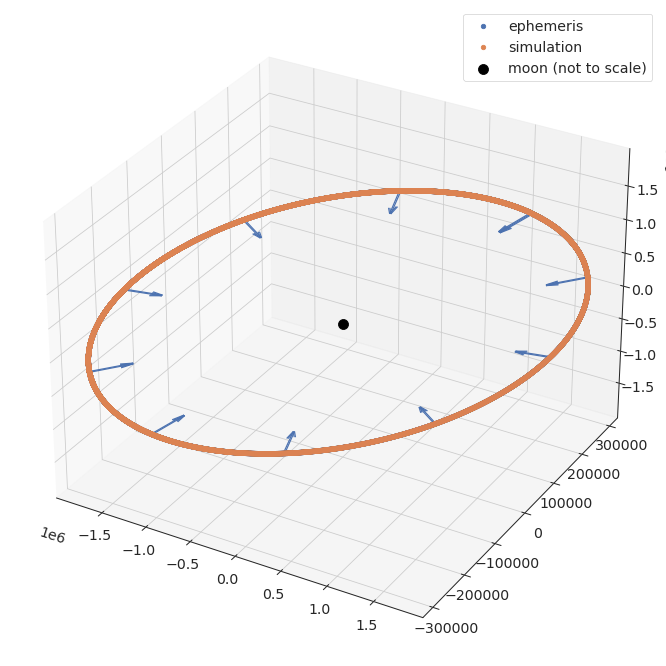

In [6]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot(df, label):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
    
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  df[f"{acc_name}_x"], df[f"{acc_name}_y"], df[f"{acc_name}_z"], length=2e5)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d')
    
    # do_plot(df.loc["2009-07-10":"2009-07-20"])
    # do_plot(df.loc["2009-10-10":"2009-10-20"])
    # do_plot(df.loc["2010-01-01":"2010-01-02"])
    
    do_plot(df_ephemeris, "ephemeris")
    do_plot_with_acc(df_simulation, "simulation", "acc_grav_moon")
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    plt.legend()
    
plot_orbit_3d(df_ephemeris, df_simulation)

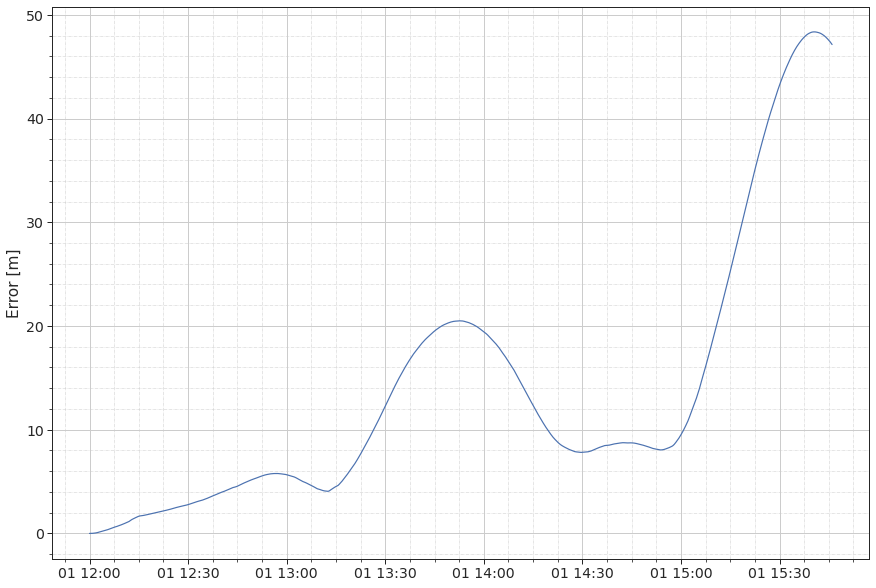

In [7]:
def plot_error(df_ephemeris, df_simulation):
    error = df_ephemeris[["pos_x", "pos_y", "pos_z"]] - df_simulation[["pos_x", "pos_y", "pos_z"]]
    error["total"] = np.sqrt(np.square(error).sum(axis=1))
    
    plt.figure(figsize=[12, 8])
    plt.plot(error.index, error["total"])
    plt.ylabel("Error [m]")
    format_plot()
    
plot_error(df_ephemeris, df_simulation)

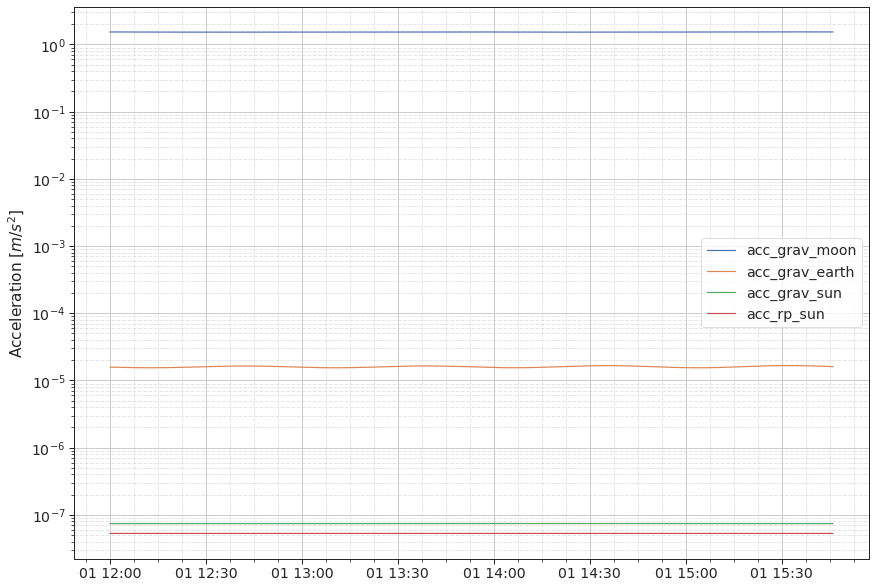

In [8]:
def plot_accelerations(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for acc in acc_names:
        plt.plot(df_simulation.index, df_simulation[acc], label=acc)
    
    plt.legend()
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.yscale("log")
    format_plot(ylocator=LogLocator(base=10, subs="all", numticks=100))
    
plot_accelerations(df_simulation)

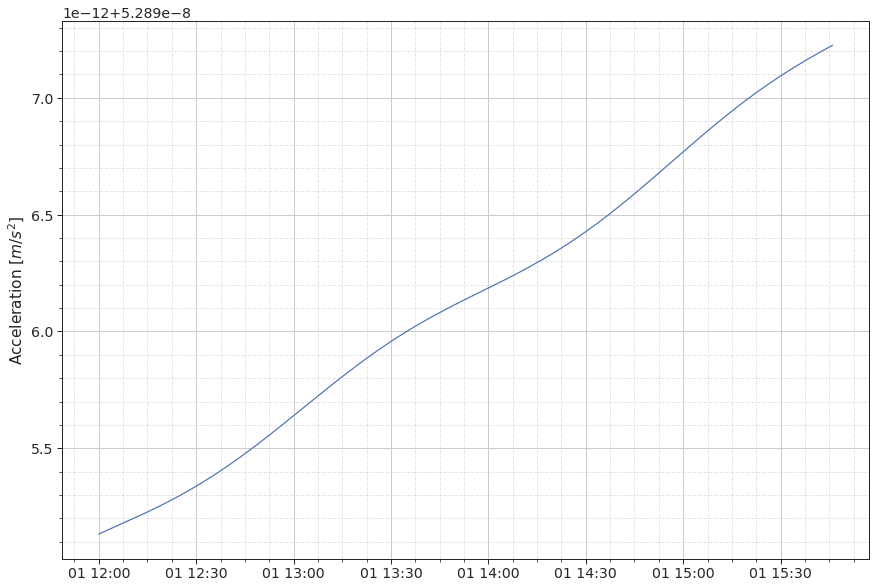

In [9]:
def plot_rp_acceleration(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["acc_rp_sun"])
    
    plt.ylabel("Acceleration [$m/s^2$]")
    format_plot()
    
plot_rp_acceleration(df_simulation)

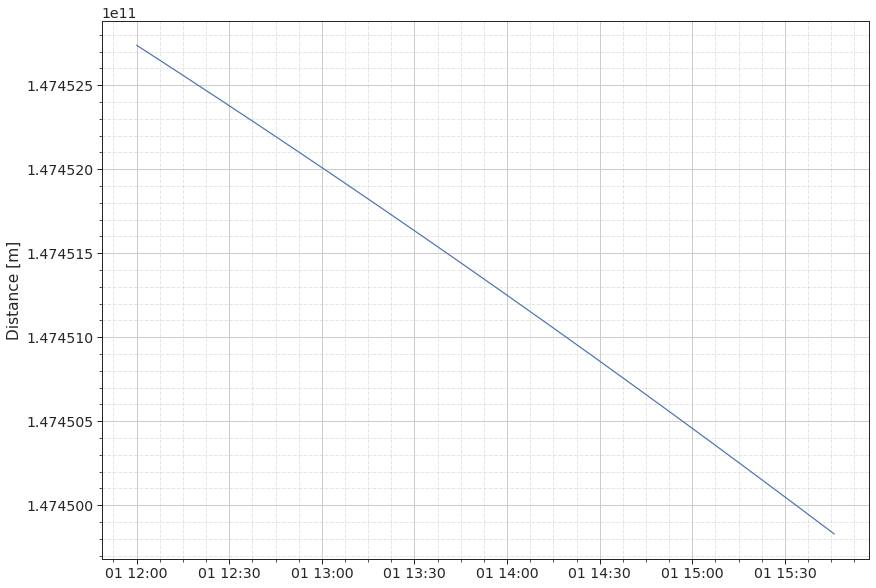

In [10]:
def plot_distance_moon_sun(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["r_sun"])
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.ylabel("Distance [m]")
    format_plot()
    
plot_distance_moon_sun(df_simulation)

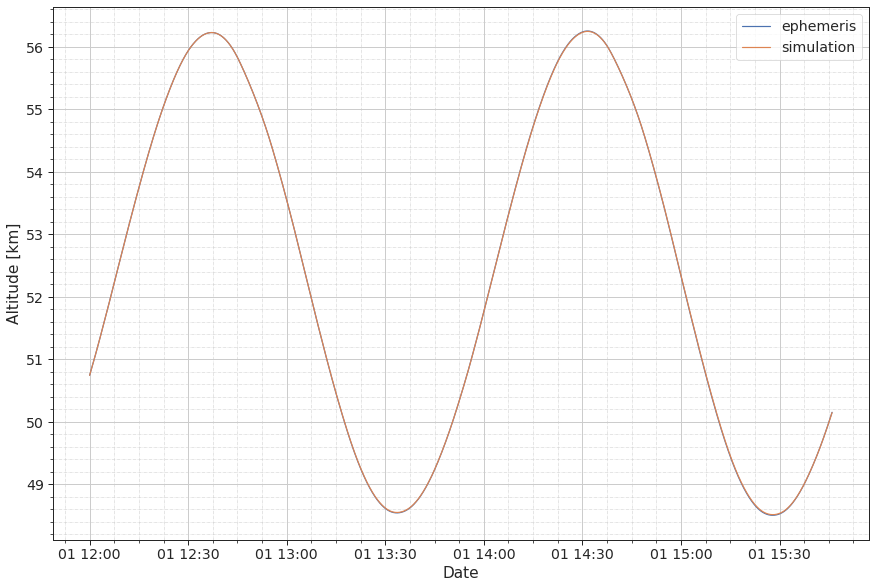

In [11]:
def plot_altitude(df_ephemeris, df_simulation):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, label="ephemeris")
    plt.plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="simulation")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    # plt.ylim([0, 250])
    # plt.xlim([dt(2009, 9, 1), dt(2009, 10, 1)]) # entering mission orbit
    # plt.xlim([dt(2010, 1, 1), dt(2010, 1, 3)])
    
    format_plot()

plot_altitude(df_ephemeris, df_simulation)